In [1]:
# Import required libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from ipywidgets import interactive

In [2]:
melb_data = pd.read_csv("melb_data.csv")
pd.set_option('display.max_colwidth', None)

In [3]:
melb_data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [4]:
# Checking for missing values, data types, and basic statistics
missing_values = melb_data.isnull().sum()
data_types = melb_data.dtypes
basic_statistics = melb_data.describe()

missing_values, data_types, basic_statistics

(Suburb              0
 Address             0
 Rooms               0
 Type                0
 Price               0
 Method              0
 SellerG             0
 Date                0
 Distance            0
 Postcode            0
 Bedroom2            0
 Bathroom            0
 Car                62
 Landsize            0
 BuildingArea     6450
 YearBuilt        5375
 CouncilArea      1369
 Lattitude           0
 Longtitude          0
 Regionname          0
 Propertycount       0
 dtype: int64,
 Suburb            object
 Address           object
 Rooms              int64
 Type              object
 Price            float64
 Method            object
 SellerG           object
 Date              object
 Distance         float64
 Postcode         float64
 Bedroom2         float64
 Bathroom         float64
 Car              float64
 Landsize         float64
 BuildingArea     float64
 YearBuilt        float64
 CouncilArea       object
 Lattitude        float64
 Longtitude       float64
 Regionn

In [5]:
# Define a function to safely handle the mode operation, even if it results in an empty series
def safe_mode(series):
    mode_result = pd.Series.mode(series)
    if mode_result.empty:
        # If the result is empty, return a placeholder value, e.g., 'Unknown'
        return 'Unknown'
    else:
        # Otherwise, return the first mode
        return mode_result.iloc[0]

# Apply the safe_mode function to the 'CouncilArea' within the groupby operation
most_common_council_area = melb_data.groupby('Suburb')['CouncilArea'].agg(safe_mode).to_frame('CouncilArea_most_common')

# Merge the most common council area back to the original dataframe
melb_data = melb_data.merge(most_common_council_area, on='Suburb', how='left')

# Replace missing values in 'CouncilArea' with the most common council area of the suburb
melb_data['CouncilArea'] = melb_data['CouncilArea'].fillna(melb_data['CouncilArea_most_common'])

# Convert 'Date' column to datetime format
melb_data['Date'] = pd.to_datetime(melb_data['Date'])

# Check the 'CouncilArea' column for the unique values and types after modifications
council_area_unique_values = melb_data['CouncilArea'].unique()
council_area_unique_types = {type(val) for val in melb_data['CouncilArea']}

council_area_unique_values, council_area_unique_types


(array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
        'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
        'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
        'Melbourne', 'Kingston', 'Brimbank', 'Hume', 'Knox', 'Maroondah',
        'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik', 'Whittlesea',
        'Frankston', 'Macedon Ranges', 'Yarra Ranges', 'Wyndham',
        'Cardinia', 'Unavailable', 'Moorabool', 'Unknown'], dtype=object),
 {str})

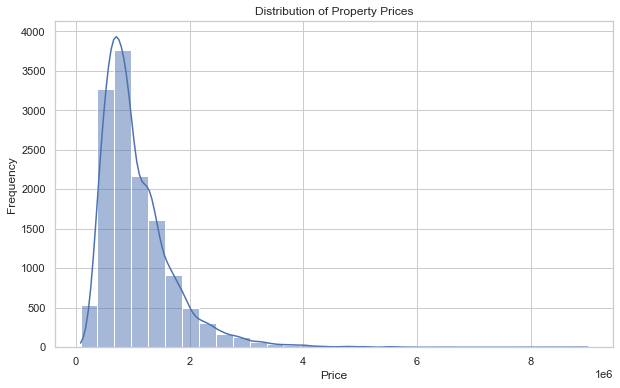

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of Property Prices
plt.figure(figsize=(10, 6))
sns.histplot(melb_data['Price'], kde=True, bins=30)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


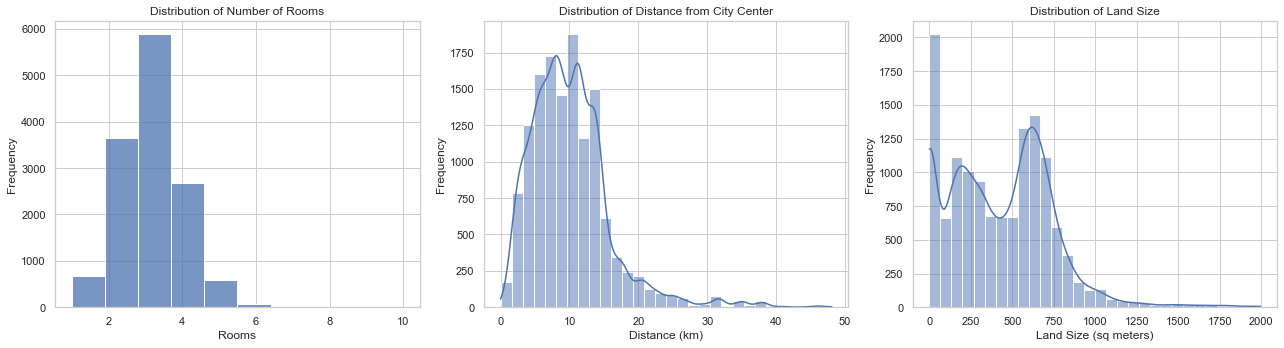

In [7]:
# Setting up the figure for multiple plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of Number of Rooms
sns.histplot(melb_data['Rooms'], bins=10, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Number of Rooms')
axes[0].set_xlabel('Rooms')
axes[0].set_ylabel('Frequency')

# Distribution of Distance from City Center
sns.histplot(melb_data['Distance'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Distance from City Center')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Frequency')

# Distribution of Land Size
sns.histplot(melb_data[melb_data['Landsize'] < 2000]['Landsize'], bins=30, kde=True, ax=axes[2])  # Limit to <2000 for better visualization
axes[2].set_title('Distribution of Land Size')
axes[2].set_xlabel('Land Size (sq meters)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


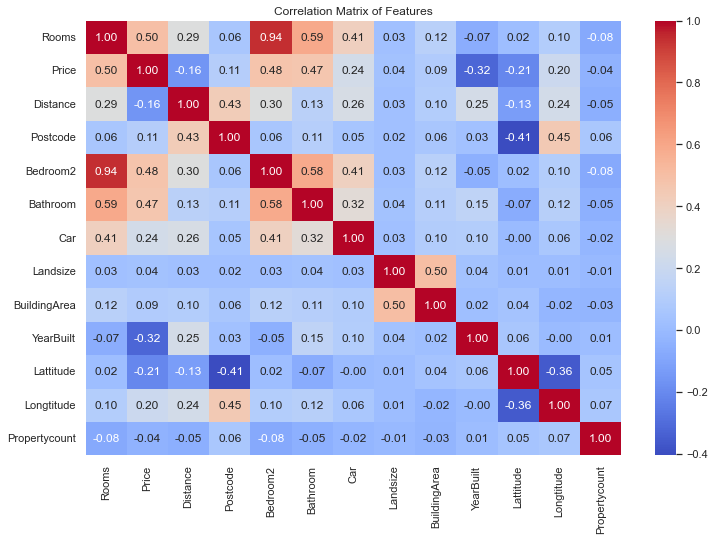

In [8]:
# Correlation Matrix
correlation_matrix = melb_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


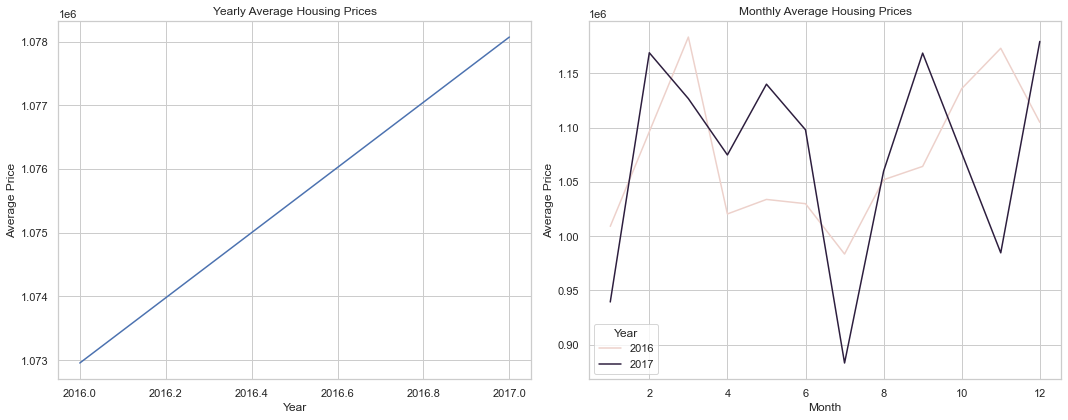

In [9]:
# Converting 'Date' to datetime format
melb_data['Date'] = pd.to_datetime(melb_data['Date'])

# Extracting year and month for temporal analysis
melb_data['Year'] = melb_data['Date'].dt.year
melb_data['Month'] = melb_data['Date'].dt.month

# Aggregating average prices by year and month
yearly_avg_price = melb_data.groupby('Year')['Price'].mean()
monthly_avg_price = melb_data.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Plotting temporal trends in housing prices
plt.figure(figsize=(15, 6))

# Yearly trend
plt.subplot(1, 2, 1)
sns.lineplot(x=yearly_avg_price.index, y=yearly_avg_price.values)
plt.title('Yearly Average Housing Prices')
plt.xlabel('Year')
plt.ylabel('Average Price')

# Monthly trend
plt.subplot(1, 2, 2)
sns.lineplot(x='Month', y='Price', hue='Year', data=monthly_avg_price)
plt.title('Monthly Average Housing Prices')
plt.xlabel('Month')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()


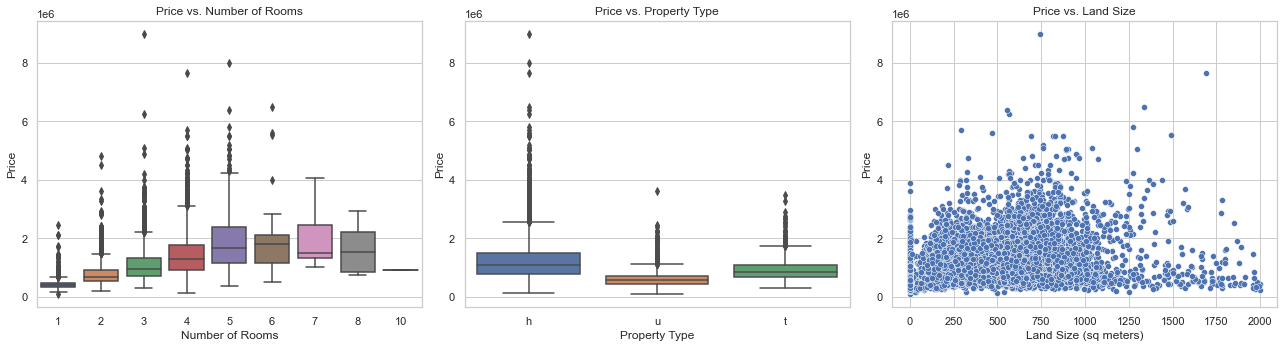

In [10]:
# Setting up the figure for multiple plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Relationship between Number of Rooms and Price
sns.boxplot(x='Rooms', y='Price', data=melb_data, ax=axes[0])
axes[0].set_title('Price vs. Number of Rooms')
axes[0].set_xlabel('Number of Rooms')
axes[0].set_ylabel('Price')

# Relationship between Property Type and Price
sns.boxplot(x='Type', y='Price', data=melb_data, ax=axes[1])
axes[1].set_title('Price vs. Property Type')
axes[1].set_xlabel('Property Type')
axes[1].set_ylabel('Price')

# Relationship between Land Size and Price (considering land sizes less than 2000 for better visualization)
sns.scatterplot(x='Landsize', y='Price', data=melb_data[melb_data['Landsize'] < 2000], ax=axes[2])
axes[2].set_title('Price vs. Land Size')
axes[2].set_xlabel('Land Size (sq meters)')
axes[2].set_ylabel('Price')

plt.tight_layout()
plt.show()
